### TTest-T3

In [193]:
import pandas as pd
from scipy.stats import ttest_ind
import numpy as np
import scipy
from tqdm import tqdm, trange
#from tqdm import tnrange,tqdm_notebook
import matplotlib.pyplot as plt
from scipy.stats import t
import matplotlib.pyplot as plt
import gmpy2
from gmpy2 import mpz,mpq,mpfr,mpc
import os
import scipy.io as sio
import matplotlib.pyplot as plt
from tqdm import tnrange,tqdm_notebook

In [194]:
d_len = 50
d_file_len = 50
num_files = 1200000

In [195]:
def prodTraces(path):
    myArray = []
    #myArray = np.array(myArray)
    index = 0
    index2 = 1
    df_data = pd.read_csv(path)
    df_data = df_data.drop(['label'],axis=1)
    df_data = df_data * df_data
    
    myArray = np.array(df_data[0:600000])
    myArray = myArray.sum(axis=0)
    myArray = np.array([myArray])
      
    return(myArray)

In [196]:
def sumTraces(path):
    myArray = []
    myArray = np.array(myArray)
    index = 0
    df_data = pd.read_csv(path)
    df_data = df_data.drop(['label'],axis=1)
        
    myArray = np.array(df_data[0:600000])
    myArray = myArray.sum(axis=0)
    myArray = np.array([myArray])      
    return(myArray)

### Calculate sum and prod

In [197]:
# calulate sum for dataset 1
df_ds1_sum = sumTraces('../DataFactory/FixedPlaintext/TS3_A.csv')
df_ds1_sum = np.array(df_ds1_sum)

In [198]:
# calulate sum for dataset 2
df_ds2_sum = sumTraces('../DataFactory/FixedPlaintext/TS3_B.csv')
df_ds2_sum = np.array(df_ds2_sum)

In [199]:
# calulate prod for dataset 1
df_ds1_prod = prodTraces("../DataFactory/FixedPlaintext/TS3_A.csv")
df_ds1_prod = np.array(df_ds1_prod)

In [200]:
# calulate sum for dataset 2
df_ds2_prod = prodTraces('../DataFactory/FixedPlaintext/TS3_B.csv')
df_ds2_prod = np.array(df_ds2_prod)

In [201]:
rl_num = 600000

In [202]:
df_ds1_mean = df_ds1_sum / rl_num
df_ds1_mean=df_ds1_mean[0]

In [203]:
df_ds2_mean = df_ds2_sum / rl_num
df_ds2_mean = df_ds2_mean[0]

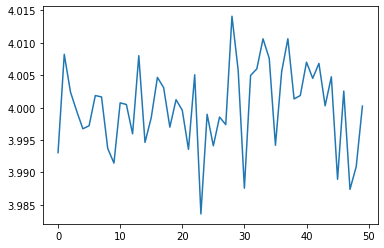

In [204]:
plt.plot(df_ds1_mean)

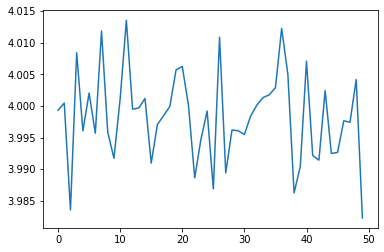

In [205]:
plt.plot(df_ds2_mean)

In [206]:
df_ds1_var = 1/rl_num*(((df_ds1_sum ** 2) / rl_num) + df_ds1_prod)

In [207]:
df_ds2_var = 1/rl_num*(((df_ds2_sum ** 2) / rl_num) + df_ds2_prod)

In [208]:
df_ds1_std = np.sqrt(df_ds1_var)

In [209]:
df_ds1_std = df_ds1_std[0]

In [210]:
df_ds2_std = np.sqrt(df_ds2_var)
df_ds2_std = df_ds2_std[0]

In [211]:
import matplotlib.pyplot as plt

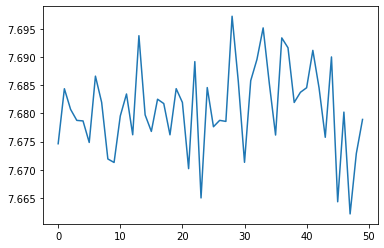

In [212]:
plt.plot(df_ds1_std)

### T-Test 

In [213]:
def tMean(data1,data2):
    return(data1 - data2)

In [214]:
def tSN(std,n):
    return(std**2/n)

In [215]:
def ttestCalc(mean1,mean2,std1,std2,data_len):
    tv = (tMean(mean1,mean2)) / (np.sqrt(tSN(std1,data_len) + tSN(std2,data_len)))
    return(np.abs(tv))

In [216]:
def tTest(df_ds1_mean,df_ds2_mean,df_ds1_std,df_ds2_std,tLeng):
    arr_collect_All=[]
    #for j in tnrange(0,(int(tLeng/2))):
    for j in tnrange(0,tLeng):    
        arr_collect=[]
        arr_collect_All.append(ttestCalc(df_ds1_mean[j],df_ds2_mean[j],df_ds1_std[j],df_ds2_std[j],rl_num))
            #arr_collect.append(ttestCalc(df_ds1_mean[j],df_ds2_mean[i],df_ds1_std[j],df_ds2_std[i],data1,data2))
        #arr_collect_All.append(np.amax(arr_collect))
    return(arr_collect_All)

In [217]:
len(df_ds2_std)

50

In [218]:
myTest = tTest(df_ds1_mean,df_ds2_mean,df_ds1_std,df_ds2_std,len(df_ds2_std))

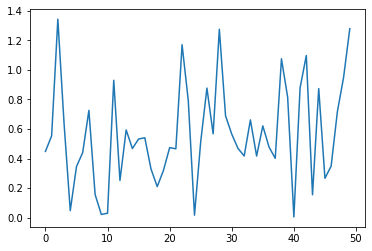

In [219]:
plt.plot(myTest)

In [220]:
myTest = tTest(df_ds1_mean,df_ds2_mean,df_ds1_std,df_ds2_std,len(df_ds2_std))

In [221]:
#myTest = tTest(df_ds1_mean[30000:500000],df_ds2_mean[30000:500000],df_ds1_std[30000:500000],df_ds2_std[30000:500000],len(df_ds2_std[30000:500000]))

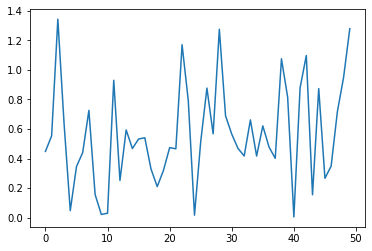

In [222]:
plt.plot(myTest)

### Degree of freedom

In [223]:
def vS2(data_len,df_ds1_std,df_ds2_std):    
    s22 = (tSN(df_ds1_std,data_len) + tSN(df_ds2_std,data_len))**2
    return(s22)

In [224]:
def df(df_ds1_std,df_ds2_std):
    
    data_len = rl_num
    s22 = vS2(data_len,df_ds1_std,df_ds2_std)
    
    term1 = (df_ds1_std**2 / (data_len))**2 / (data_len - 1)
    term2 = (df_ds2_std**2 / (data_len))**2 / (data_len - 1)

    v = s22 / (term1 + term2)
    
    return(v)

### CDF

In [225]:
def cdf(df_ds1_mean,df_ds2_mean,df_ds1_std,df_ds2_std):
    cdf_array = []
    
    colLen = 50

    tV = tTest(df_ds1_mean,df_ds2_mean,df_ds1_std,df_ds2_std,colLen)
    #print(tV)
    v = df(df_ds1_std,df_ds2_std)
    
    
    #print("t-value",tV[24])
    #print("v-value",v[24])
    
    for i in range(0,colLen):
        cdf_array.append(t.cdf(-1 *(tV[i]),v[i]))
        
    return(cdf_array)

### T-Test TS1

In [226]:
#df_CDF = cdf(df_ds1_mean[30000:500000],df_ds2_mean[30000:500000],df_ds1_std[30000:500000],df_ds2_std[30000:500000])

In [227]:
df_CDF = cdf(df_ds1_mean,df_ds2_mean,df_ds1_std,df_ds2_std)

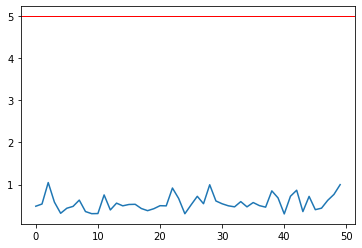

In [228]:
plt.plot(-np.log10(df_CDF),'-')
plt.axhline(y=5.0, xmin=0, xmax=1, color='r', linestyle='-', lw=1)
plt.show()

### Analyzing

In [229]:
meanData = df_ds1_mean - df_ds2_mean

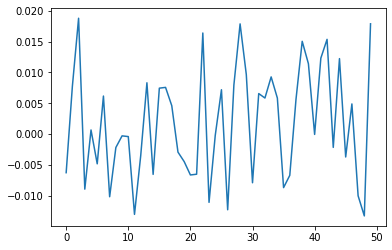

In [230]:
plt.plot(meanData)